#  About This Project

This notebook presents a machine learning solution to predict **bank credit risk**, aiming to classify loan applicants as **high-risk or low-risk** based on their financial and demographic data. Accurate credit risk prediction helps banks reduce loan defaults and improve portfolio health.

---

##  Dataset Overview

The dataset includes a variety of features related to a client's financial behavior, credit history, demographic details, and loan information. Some of the key features include:

- **Debt** – Total outstanding debt  
- **Overdue Days** – Number of days a payment is overdue  
- **Initial Limit** – Initial credit limit  
- **Credit History Rating** – Client's credit rating  
- **Income, Education, Family Status** – Socioeconomic information  
- **Probability of Default (PDN)** – Target variable indicating default risk  

> ⚠️ **Language Note:** The original dataset contained **column names and values in a non-English language** (Russian). As part of preprocessing, I translated the entire dataset into **English** to ensure clarity, consistency, and ease of model training and interpretation.

---

##  Model Summary

- **Model Used:** Random Forest Classifier  
- **Accuracy Achieved:** 98%  
- Trained on cleaned, translated, and well-preprocessed data  
- Evaluated using accuracy, confusion matrix, and classification report  
- Model saved in `.joblib` format for deployment

---

This project demonstrates a robust approach to credit risk modeling using machine learning and showcases practical handling of multilingual real-world datasets.


****

#  About the Author

**👤 Name:** Muhammad Umer  
**🔗 LinkedIn:** [https://www.linkedin.com/in/therealumerhayat/](https://www.linkedin.com/in/therealumerhayat/)  
**📧 Gmail:** umerhayat282@gmail.com  
**📞 Contact Number:** +92 302 9854427 / +92 317 6239577

***

# 1 Data Preprocessing

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


import warnings
warnings.filterwarnings('ignore')

In [182]:
df = pd.read_csv(r'C:\Users\abc\Downloads\bank_credit_scoring.csv')
df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [183]:
df.columns

Index(['Задолженность', 'Просрочка, дни', 'Первоначльный лимит', 'BIRTHDATE',
       'SEX', 'EDU', 'INCOME', 'TERM', 'Рейтинг кредитной истории', 'LV_AREA',
       'LV_SETTLEMENTNAME', 'INDUSTRYNAME', 'PDN', 'CLIENTID', 'SCORINGMARK',
       'UNDERAGECHILDRENCOUNT', 'VELCOMSCORING', 'FAMILYSTATUS'],
      dtype='object')

In [184]:
#rename the columns to English for better readability

df.rename(columns={
    'Задолженность': 'Debt',
    'Просрочка, дни': 'Overdue_Days',
    'Первоначльный лимит': 'Initial_Limit',
    'BIRTHDATE': 'Birthdate',
    'SEX': 'Gender',
    'EDU': 'Education',
    'INCOME': 'Income',
    'TERM': 'Term',
    'Рейтинг кредитной истории': 'Credit_History_Rating',
    'LV_AREA': 'Region',
    'LV_SETTLEMENTNAME': 'Settlement_Name',
    'INDUSTRYNAME': 'Industry_Name',
    'PDN': 'Probability_of_Default',
    'CLIENTID': 'Client_ID',
    'SCORINGMARK': 'Scoring_Mark',
    'UNDERAGECHILDRENCOUNT': 'Underage_Children_Count',
    'VELCOMSCORING': 'Velcom_Scoring',
    'FAMILYSTATUS': 'Family_Status'
}, inplace=True)

df.head()

,Debt,Overdue_Days,Initial_Limit,Birthdate,Gender,Education,Income,Term,Credit_History_Rating,Region,Settlement_Name,Industry_Name,Probability_of_Default,Client_ID,Scoring_Mark,Underage_Children_Count,Velcom_Scoring,Family_Status
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [185]:
df.columns

Index(['Debt', 'Overdue_Days', 'Initial_Limit', 'Birthdate', 'Gender',
       'Education', 'Income', 'Term', 'Credit_History_Rating', 'Region',
       'Settlement_Name', 'Industry_Name', 'Probability_of_Default',
       'Client_ID', 'Scoring_Mark', 'Underage_Children_Count',
       'Velcom_Scoring', 'Family_Status'],
      dtype='object')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Debt                     18420 non-null  float64
 1   Overdue_Days             18420 non-null  int64  
 2   Initial_Limit            18420 non-null  float64
 3   Birthdate                18420 non-null  object 
 4   Gender                   18420 non-null  object 
 5   Education                18420 non-null  object 
 6   Income                   18420 non-null  float64
 7   Term                     18420 non-null  int64  
 8   Credit_History_Rating    17488 non-null  object 
 9   Region                   16297 non-null  object 
 10  Settlement_Name          18374 non-null  object 
 11  Industry_Name            18420 non-null  object 
 12  Probability_of_Default   18420 non-null  float64
 13  Client_ID                18420 non-null  int64  
 14  Scoring_Mark          

In [187]:
df['Birthdate'] = pd.to_datetime(df['Birthdate'], format='%Y-%m-%d')
df.info()  # To verify the change in data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Debt                     18420 non-null  float64       
 1   Overdue_Days             18420 non-null  int64         
 2   Initial_Limit            18420 non-null  float64       
 3   Birthdate                18420 non-null  datetime64[ns]
 4   Gender                   18420 non-null  object        
 5   Education                18420 non-null  object        
 6   Income                   18420 non-null  float64       
 7   Term                     18420 non-null  int64         
 8   Credit_History_Rating    17488 non-null  object        
 9   Region                   16297 non-null  object        
 10  Settlement_Name          18374 non-null  object        
 11  Industry_Name            18420 non-null  object        
 12  Probability_of_Default   18420 n

In [188]:
object_columns = df.select_dtypes(include=['object'])
object_columns.head()

,Gender,Education,Credit_History_Rating,Region,Settlement_Name,Industry_Name
0,Мужской,Среднее специальное,A1,Гомельская область,КОСАКОВКА,АПК
1,Женский,Высшее,B2,NaN,МИНСК,Финансы и страхование
2,Женский,Среднее,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение
3,Женский,Среднее специальное,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление
4,Женский,Высшее,B3,NaN,Минск,Медицина и здравоохранение


In [189]:
for col in object_columns:
    print(col, ':', df[col].unique())

Gender : ['Мужской' 'Женский']
Education : ['Среднее специальное' 'Высшее' 'Среднее' 'Неоконченное высшее'
 '**Послевузовское']
Credit_History_Rating : ['A1' 'B2' 'C2' 'A3' 'B3' 'C1' 'D1' nan 'D2' 'C3' 'A2' 'B1' 'D3' '-1' 'E1'
 'E3' 'E2']
Region : ['Гомельская область' nan 'ГРОДНЕНСКАЯ' 'МИНСКАЯ' 'БРЕСТСКАЯ' 'г. Минск'
 'ГОМЕЛЬСКАЯ' 'Минская область' 'Брестская область' 'Гродненская область'
 'Могилевская область' 'Витебская область' 'Г. МИНСК' 'ВИТЕБСКАЯ ОБЛАСТЬ'
 'ВИТЕБСКАЯ' 'Могилевская' 'МОГИЛЕВСКАЯ' 'МИНСКАЯ ОБЛАСТЬ'
 'ГОМЕЛЬСКАЯ ОБЛАСТЬ' 'МОГИЛЁВСКАЯ' 'Минская' 'БРЕСТСКАЯ ОБЛАСТЬ'
 'ГРОДНЕНСКАЯ ОБЛАСТЬ' 'МОГИЛЕВСКАЯ ОБЛАСТЬ' 'Витебская' 'Гомельская'
 'МИНСК' 'Брестская' 'Гродненская' 'ГОМЕЛЬСКАЯ ОБЛ' 'МОГИЛЕВСК']
Settlement_Name : ['КОСАКОВКА' 'МИНСК' 'ЁДКИ' ... 'ДИВИН' 'Копцевичи' 'Жалы']
Industry_Name : ['АПК' 'Финансы и страхование' 'Медицина и здравоохранение'
 'Государственное управление' 'Производство' 'Услуги населению'
 'Строительство' 'Торговля' 'Информационные технологи

In [190]:
#transform the rows to english
gender_dict = {
    'Мужской': 'Male',
    'Женский': 'Female'
}

education_dict = {
    'Высшее': 'Higher',
    'Среднее': 'Secondary',
    'Неоконченное высшее': 'Incomplete_Higher',
    'Среднее специальное': 'Secondary_Specialized',
    '**Послевузовское': 'Postgraduate',
}

industry_dict = {
    'АПК': 'Agro-Industrial Complex',
    'Финансы и страхование': 'Finance and Insurance',
    'Медицина и здравоохранение': 'Healthcare',
    'Государственное управление': 'Government Administration',
    'Производство': 'Manufacturing',
    'Услуги населению': 'Public Services',
    'Строительство': 'Construction',
    'Торговля': 'Trade',
    'Информационные технологии': 'Information Technology',
    'Транспорт/перевозки': 'Transport/Logistics',
    'Иное': 'Other',
    'Наука и образование': 'Science and Education',
    'Спорт и туризм': 'Sports and Tourism',
    'МВД/МЧС/МО': 'Law Enforcement/Emergency/Military',
    'Культура и искусство': 'Culture and Arts',
    'Пенсионер': 'Pensioner'
}
living_area_dict = {
    # Gomel Region
    'Гомельская область': 'Gomel Region',
    'ГОМЕЛЬСКАЯ': 'Gomel Region',
    'ГОМЕЛЬСКАЯ ОБЛАСТЬ': 'Gomel Region',
    'Гомельская': 'Gomel Region',
    'ГОМЕЛЬСКАЯ ОБЛ': 'Gomel Region',

    # Grodno Region
    'ГРОДНЕНСКАЯ': 'Grodno Region',
    'Гродненская область': 'Grodno Region',
    'Гродненская': 'Grodno Region',
    'ГРОДНЕНСКАЯ ОБЛАСТЬ': 'Grodno Region',

    # Minsk Region
    'МИНСКАЯ': 'Minsk Region',
    'Минская область': 'Minsk Region',
    'Минская': 'Minsk Region',
    'МИНСКАЯ ОБЛАСТЬ': 'Minsk Region',

    # Brest Region
    'БРЕСТСКАЯ': 'Brest Region',
    'Брестская область': 'Brest Region',
    'Брестская': 'Brest Region',
    'БРЕСТСКАЯ ОБЛАСТЬ': 'Brest Region',

    # Mogilev Region
    'Могилевская область': 'Mogilev Region',
    'МОГИЛЕВСКАЯ': 'Mogilev Region',
    'МОГИЛЕВСКАЯ ОБЛАСТЬ': 'Mogilev Region',
    'МОГИЛЁВСКАЯ': 'Mogilev Region',
    'Могилевская': 'Mogilev Region',
    'МОГИЛЕВСК': 'Mogilev Region',

    # Vitebsk Region
    'Витебская область': 'Vitebsk Region',
    'ВИТЕБСКАЯ ОБЛАСТЬ': 'Vitebsk Region',
    'ВИТЕБСКАЯ': 'Vitebsk Region',
    'Витебская': 'Vitebsk Region',

    # Minsk City
    'г. Минск': 'Minsk City',
    'Г. МИНСК': 'Minsk City',
    'МИНСК': 'Minsk City'
}


In [191]:
df['Gender'] = df['Gender'].map(gender_dict)
df['Education'] = df['Education'].map(education_dict)
df['Region'] = df['Region'].map(living_area_dict)
df['Settlement_Name'] = df['Settlement_Name'].map(living_area_dict)
df['Industry_Name'] = df['Industry_Name'].map(industry_dict)

In [192]:
df.head()

,Debt,Overdue_Days,Initial_Limit,Birthdate,Gender,Education,Income,Term,Credit_History_Rating,Region,Settlement_Name,Industry_Name,Probability_of_Default,Client_ID,Scoring_Mark,Underage_Children_Count,Velcom_Scoring,Family_Status
0,6063.50,3,7000.0,1983-07-08,Male,Secondary_Specialized,703.07,60,A1,Gomel Region,NaN,Agro-Industrial Complex,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Female,Higher,1693.68,60,B2,NaN,Minsk City,Finance and Insurance,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Female,Secondary,724.49,60,C2,Grodno Region,NaN,Healthcare,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Female,Secondary_Specialized,1045.84,60,A3,Minsk Region,NaN,Government Administration,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Female,Higher,1092.65,60,B3,NaN,NaN,Healthcare,0.63,425193,NaN,0,NaN,2


Now we have converted our data from Russion to English. lets do some basic Data Cleaning

In [193]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Settlement_Name            79.505972
Velcom_Scoring             51.742671
Region                     11.525516
Scoring_Mark                8.870793
Credit_History_Rating       5.059718
Debt                        0.000000
Overdue_Days                0.000000
Education                   0.000000
Initial_Limit               0.000000
Birthdate                   0.000000
Income                      0.000000
Term                        0.000000
Gender                      0.000000
Industry_Name               0.000000
Client_ID                   0.000000
Probability_of_Default      0.000000
Underage_Children_Count     0.000000
Family_Status               0.000000
dtype: float64

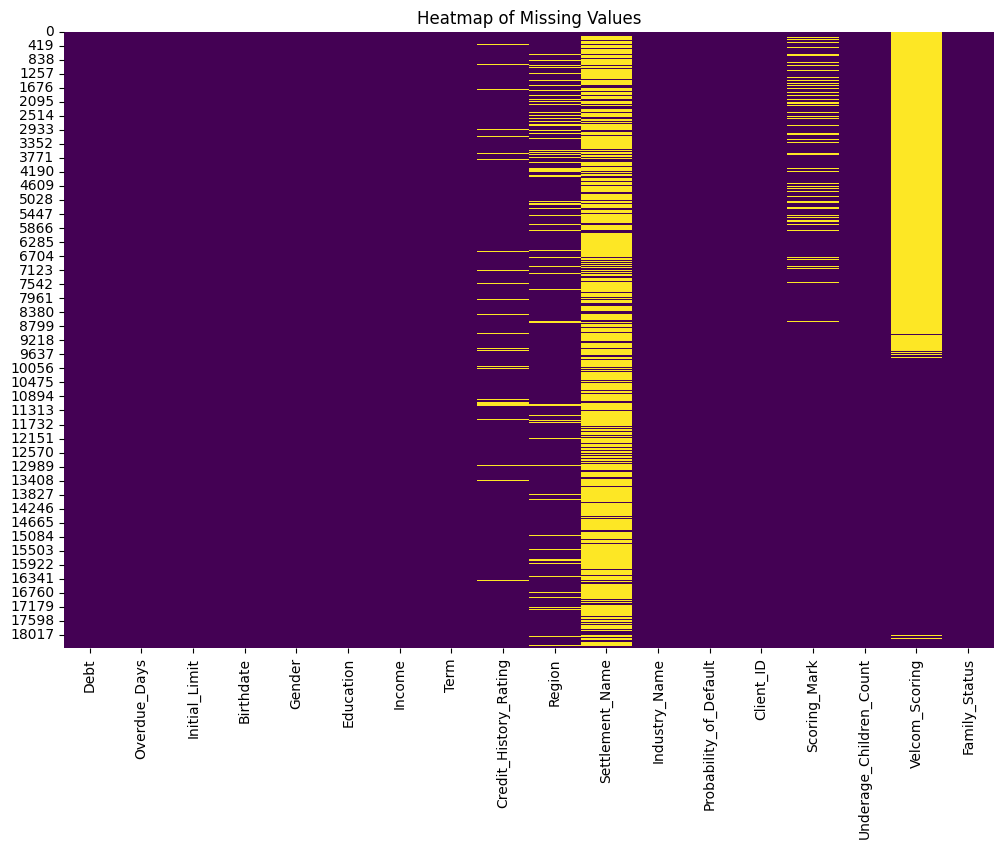

In [194]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

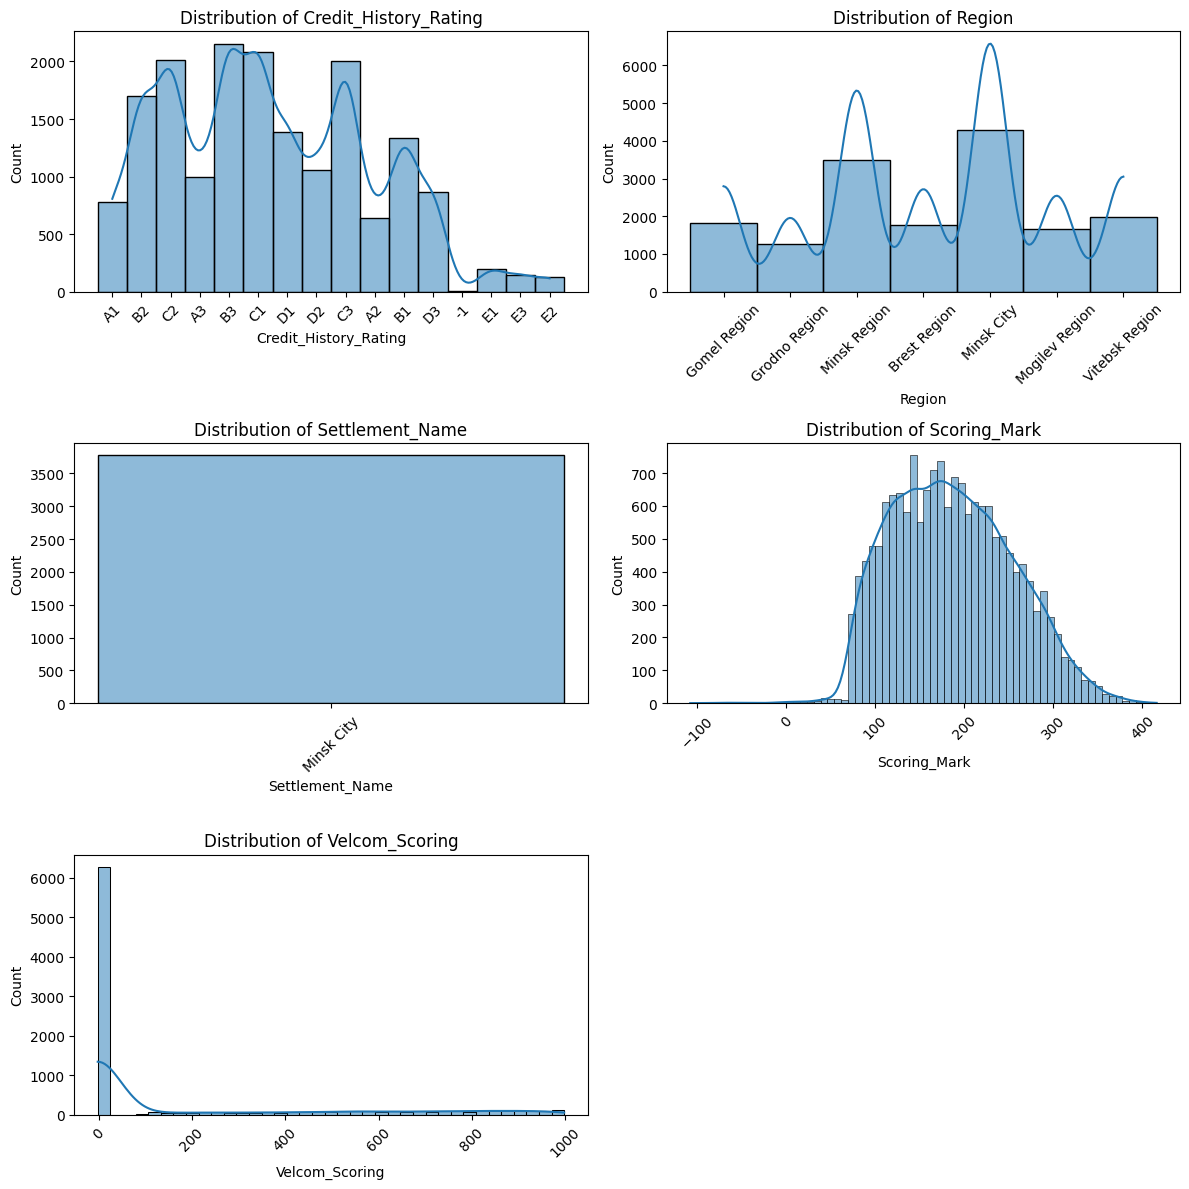

In [195]:
#checking the distribution of the columns with null values
plt.figure(figsize=(12, 12))
for i, col in enumerate(columns_with_nulls):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [196]:
# Fill missing values
df['Credit_History_Rating'].fillna(df['Credit_History_Rating'].mode()[0], inplace=True)
df['Region'].fillna(df['Region'].mode()[0], inplace=True)
df['Scoring_Mark'].fillna(df['Scoring_Mark'].mean(), inplace=True)
df['Settlement_Name'].fillna(df['Settlement_Name'].mode()[0], inplace=True)

df.drop(columns=['Velcom_Scoring'], inplace=True)


In [197]:
df.isnull().sum() / len(df) * 100

Debt                       0.0
Overdue_Days               0.0
Initial_Limit              0.0
Birthdate                  0.0
Gender                     0.0
Education                  0.0
Income                     0.0
Term                       0.0
Credit_History_Rating      0.0
Region                     0.0
Settlement_Name            0.0
Industry_Name              0.0
Probability_of_Default     0.0
Client_ID                  0.0
Scoring_Mark               0.0
Underage_Children_Count    0.0
Family_Status              0.0
dtype: float64

In [198]:
df.describe()

,Debt,Overdue_Days,Initial_Limit,Birthdate,Income,Term,Probability_of_Default,Client_ID,Scoring_Mark,Underage_Children_Count,Family_Status
count,18420.000000,18420.000000,18420.000000,18420,18420.000000,18420.000000,18420.000000,1.842000e+04,18420.000000,18420.000000,18420.000000
mean,4318.769750,9.196743,5127.834256,1987-11-11 08:20:19.543973952,1664.840782,52.301737,0.290288,8.226245e+05,186.432622,0.636754,1.498751
min,0.000000,0.000000,180.000000,1956-03-10 00:00:00,0.000000,23.000000,0.000000,1.289800e+04,-108.000000,0.000000,1.000000
25%,1287.900000,0.000000,1550.000000,1981-01-31 00:00:00,1021.692500,36.000000,0.190000,7.193478e+05,138.000000,0.000000,1.000000
50%,2675.670000,0.000000,3200.000000,1988-12-17 12:00:00,1460.175000,60.000000,0.300000,9.083645e+05,186.432622,0.000000,1.000000
75%,5785.870000,0.000000,6912.500000,1995-11-16 00:00:00,1980.460000,60.000000,0.390000,9.621360e+05,229.000000,1.000000,2.000000
max,40000.000000,491.000000,40000.000000,2005-04-28 00:00:00,29942.820000,60.000000,1.210000,1.061453e+06,416.000000,3.000000,4.000000
std,4336.432353,42.309092,4879.201691,NaN,1048.813447,13.378788,0.144359,1.966853e+05,64.370409,0.854167,0.500988


In [199]:
df['Birthdate'] = pd.to_datetime(df['Birthdate'], format='%Y-%m-%d')

In [200]:
df.head()

,Debt,Overdue_Days,Initial_Limit,Birthdate,Gender,Education,Income,Term,Credit_History_Rating,Region,Settlement_Name,Industry_Name,Probability_of_Default,Client_ID,Scoring_Mark,Underage_Children_Count,Family_Status
0,6063.50,3,7000.0,1983-07-08,Male,Secondary_Specialized,703.07,60,A1,Gomel Region,Minsk City,Agro-Industrial Complex,0.98,919517,233.000000,0,1
1,3765.04,0,5000.0,1987-12-19,Female,Higher,1693.68,60,B2,Minsk City,Minsk City,Finance and Insurance,0.17,539353,186.432622,1,1
2,2067.66,0,2650.0,1966-02-28,Female,Secondary,724.49,60,C2,Grodno Region,Minsk City,Healthcare,0.40,818913,186.432622,0,2
3,2370.39,0,3000.0,1972-02-18,Female,Secondary_Specialized,1045.84,60,A3,Minsk Region,Minsk City,Government Administration,0.29,691598,216.000000,0,2
4,2280.55,0,3000.0,1997-02-23,Female,Higher,1092.65,60,B3,Minsk City,Minsk City,Healthcare,0.63,425193,186.432622,0,2


In [201]:
#checking distribution of age(its hypothetical because we dont have the current date in the dataset)
df['Age'] = (datetime.now() - df['Birthdate']).dt.days // 365
df['Age'].describe()

count    18420.000000
mean        37.008415
std         10.251169
min         20.000000
25%         29.000000
50%         36.000000
75%         44.000000
max         69.000000
Name: Age, dtype: float64

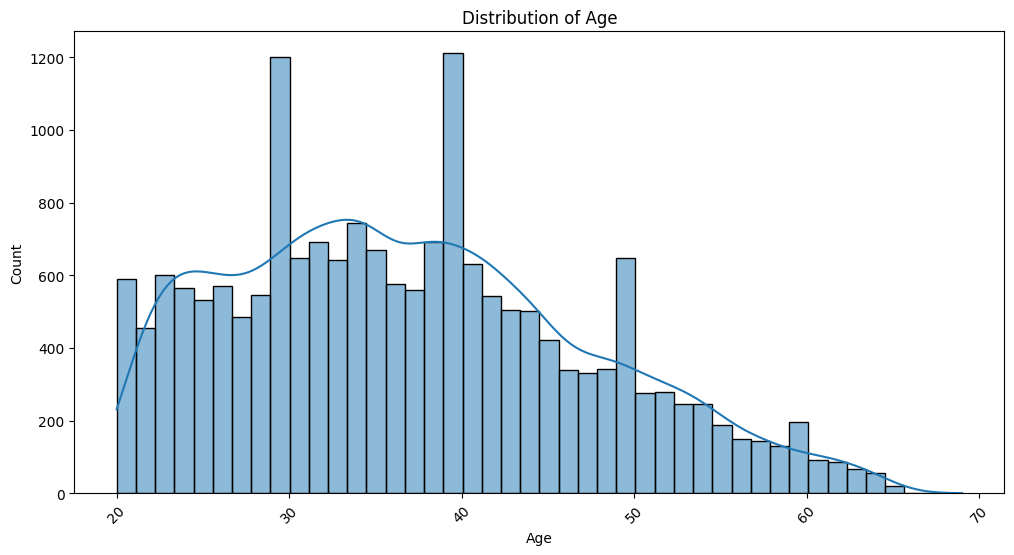

In [202]:
#plot age distribution by extracting age from birthdate
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [203]:
df['Scoring_Mark'].describe()

count    18420.000000
mean       186.432622
std         64.370409
min       -108.000000
25%        138.000000
50%        186.432622
75%        229.000000
max        416.000000
Name: Scoring_Mark, dtype: float64

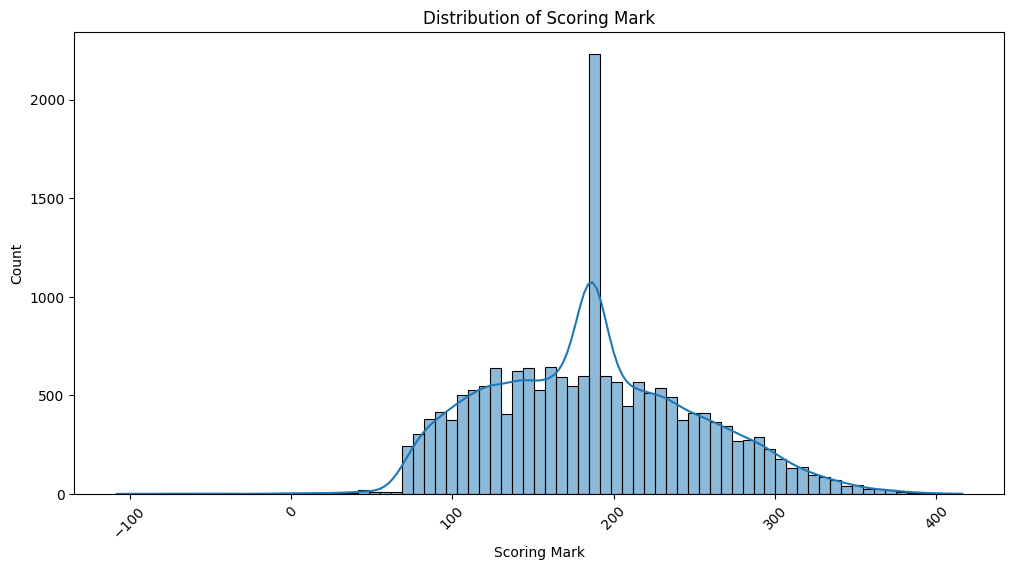

In [204]:
#checking distribution of scoring mark
plt.figure(figsize=(12, 6))
sns.histplot(df['Scoring_Mark'], kde=True)
plt.title('Distribution of Scoring Mark')
plt.xlabel('Scoring Mark')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Scoring mark can never be negative

In [205]:
#remove outlier values from scoring mark
df = df[df['Scoring_Mark'] >= 0]


In [206]:
df['Scoring_Mark'].describe()

count    18401.000000
mean       186.668545
std         63.975293
min          2.000000
25%        139.000000
50%        186.432622
75%        229.000000
max        416.000000
Name: Scoring_Mark, dtype: float64

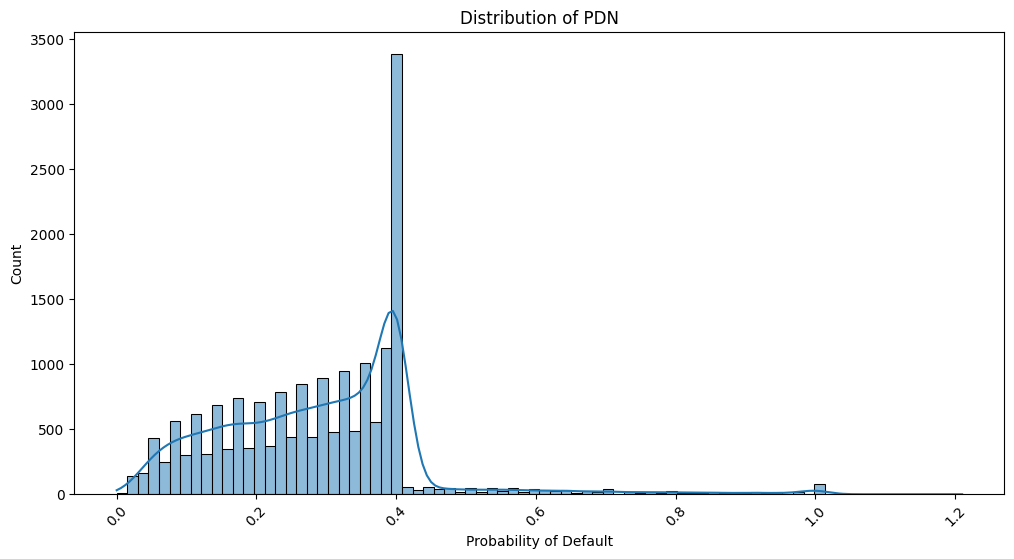

In [207]:
#check probability of default
#check PDN distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Probability_of_Default'], kde=True)
plt.title('Distribution of PDN')
plt.xlabel('Probability of Default')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Probability can never be greater than 1

In [208]:
df = df[df['Probability_of_Default']<=1]

In [209]:
df['Probability_of_Default'].describe()

count    18400.000000
mean         0.289997
std          0.143875
min          0.000000
25%          0.190000
50%          0.300000
75%          0.390000
max          1.000000
Name: Probability_of_Default, dtype: float64

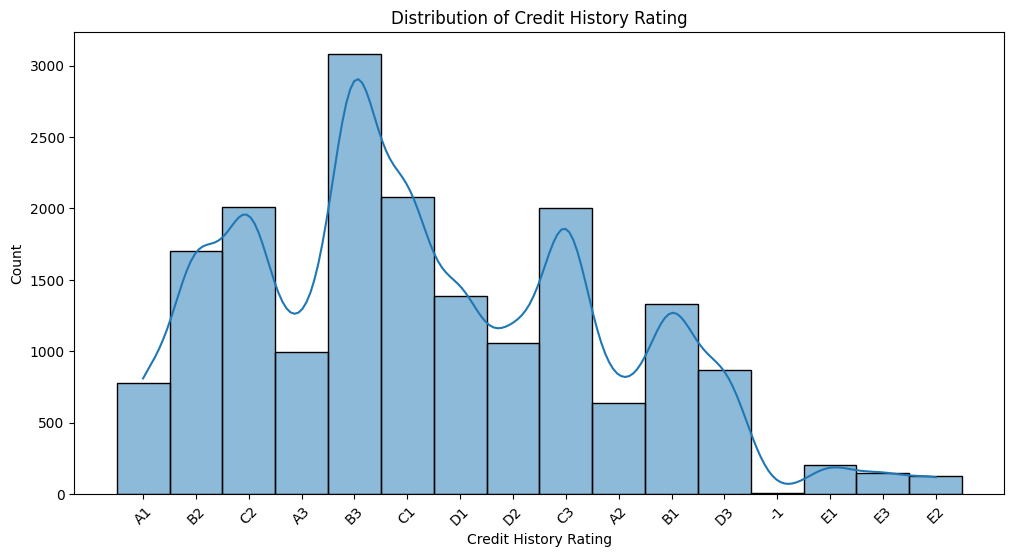

In [210]:
#ploting credit history rating
plt.figure(figsize=(12, 6))
sns.histplot(df['Credit_History_Rating'], kde=True)
plt.title('Distribution of Credit History Rating')
plt.xlabel('Credit History Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Minus one -1 considered as outlier

In [211]:
df = df[df['Credit_History_Rating']!='-1']

In [212]:
#lets see Debt coloumn
df['Debt'].describe()

count    18396.000000
mean      4319.445674
std       4337.345504
min          0.000000
25%       1287.900000
50%       2675.670000
75%       5785.870000
max      40000.000000
Name: Debt, dtype: float64

debt cant be zero its outlier

In [213]:
df = df[df['Credit_History_Rating']!= 0]

In [214]:
df.shape

(18396, 18)

In [215]:
cat_columns = [col for col in df.columns if df[col].dtype == 'object']

In [216]:
df[cat_columns].sample(10)

,Gender,Education,Credit_History_Rating,Region,Settlement_Name,Industry_Name
14258,Female,Higher,B1,Minsk City,Minsk City,Trade
14482,Male,Secondary_Specialized,B2,Minsk Region,Minsk City,Law Enforcement/Emergency/Military
6324,Male,Secondary_Specialized,D1,Gomel Region,Minsk City,Law Enforcement/Emergency/Military
12660,Female,Secondary_Specialized,D1,Minsk Region,Minsk City,Trade
7508,Male,Secondary_Specialized,A3,Minsk City,Minsk City,Sports and Tourism
834,Female,Secondary_Specialized,B3,Mogilev Region,Minsk City,Transport/Logistics
12078,Female,Secondary_Specialized,A3,Grodno Region,Minsk City,Trade
13012,Male,Higher,D2,Minsk City,Minsk City,Finance and Insurance
7465,Female,Higher,C2,Minsk City,Minsk City,Information Technology
2037,Male,Secondary,C1,Grodno Region,Minsk City,Agro-Industrial Complex


In [217]:
for col in cat_columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())
    #print value counts also
    print(df[col].value_counts())
    print("\n")

Gender: 2 unique values
['Male' 'Female']
Gender
Male      11229
Female     7167
Name: count, dtype: int64


Education: 5 unique values
['Secondary_Specialized' 'Higher' 'Secondary' 'Incomplete_Higher'
 'Postgraduate']
Education
Secondary_Specialized    9182
Higher                   6137
Secondary                2513
Incomplete_Higher         554
Postgraduate               10
Name: count, dtype: int64


Credit_History_Rating: 15 unique values
['A1' 'B2' 'C2' 'A3' 'B3' 'C1' 'D1' 'D2' 'C3' 'A2' 'B1' 'D3' 'E1' 'E3'
 'E2']
Credit_History_Rating
B3    3081
C1    2080
C2    2011
C3    2004
B2    1698
D1    1386
B1    1333
D2    1060
A3     992
D3     869
A1     776
A2     639
E1     200
E3     144
E2     123
Name: count, dtype: int64


Region: 7 unique values
['Gomel Region' 'Minsk City' 'Grodno Region' 'Minsk Region' 'Brest Region'
 'Mogilev Region' 'Vitebsk Region']
Region
Minsk City        6414
Minsk Region      3479
Vitebsk Region    1986
Gomel Region      1825
Brest Region      1767
Mog

In [218]:
dummies = pd.get_dummies(df[cat_columns], drop_first=True).astype(int)

In [219]:
df = pd.concat([df, dummies], axis=1)
df.drop(cat_columns, axis=1, inplace=True)
df.head()

,Debt,Overdue_Days,Initial_Limit,Birthdate,Income,Term,Probability_of_Default,Client_ID,Scoring_Mark,Underage_Children_Count,...,Industry_Name_Information Technology,Industry_Name_Law Enforcement/Emergency/Military,Industry_Name_Manufacturing,Industry_Name_Other,Industry_Name_Pensioner,Industry_Name_Public Services,Industry_Name_Science and Education,Industry_Name_Sports and Tourism,Industry_Name_Trade,Industry_Name_Transport/Logistics
0,6063.50,3,7000.0,1983-07-08,703.07,60,0.98,919517,233.000000,0,...,0,0,0,0,0,0,0,0,0,0
1,3765.04,0,5000.0,1987-12-19,1693.68,60,0.17,539353,186.432622,1,...,0,0,0,0,0,0,0,0,0,0
2,2067.66,0,2650.0,1966-02-28,724.49,60,0.40,818913,186.432622,0,...,0,0,0,0,0,0,0,0,0,0
3,2370.39,0,3000.0,1972-02-18,1045.84,60,0.29,691598,216.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,2280.55,0,3000.0,1997-02-23,1092.65,60,0.63,425193,186.432622,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
corr = df.corr().abs()
unstacked_corr = corr.unstack()
unstacked_corr = unstacked_corr[unstacked_corr < 1]
unstacked_corr = unstacked_corr.drop_duplicates().sort_values(ascending=False)


top_n = 10
top_n_corr = unstacked_corr.head(top_n)
print(top_n_corr)

Birthdate                Age                                0.999591
Debt                     Initial_Limit                      0.968278
Underage_Children_Count  Family_Status                      0.436007
Education_Secondary      Education_Secondary_Specialized    0.397077
Region_Minsk City        Region_Minsk Region                0.353335
Debt                     Term                               0.301032
Scoring_Mark             Credit_History_Rating_B1           0.288645
                         Credit_History_Rating_D1           0.280075
Initial_Limit            Term                               0.259075
Region_Minsk City        Region_Vitebsk Region              0.254528
dtype: float64


In [221]:
#drop bithyear and Initial limitcolumns
df.drop(['Birthdate', 'Initial_Limit', 'Age'], axis=1, inplace=True)
df.head()

,Debt,Overdue_Days,Income,Term,Probability_of_Default,Client_ID,Scoring_Mark,Underage_Children_Count,Family_Status,Gender_Male,...,Industry_Name_Information Technology,Industry_Name_Law Enforcement/Emergency/Military,Industry_Name_Manufacturing,Industry_Name_Other,Industry_Name_Pensioner,Industry_Name_Public Services,Industry_Name_Science and Education,Industry_Name_Sports and Tourism,Industry_Name_Trade,Industry_Name_Transport/Logistics
0,6063.50,3,703.07,60,0.98,919517,233.000000,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3765.04,0,1693.68,60,0.17,539353,186.432622,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2067.66,0,724.49,60,0.40,818913,186.432622,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,2370.39,0,1045.84,60,0.29,691598,216.000000,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,2280.55,0,1092.65,60,0.63,425193,186.432622,0,2,0,...,0,0,0,0,0,0,0,0,0,0


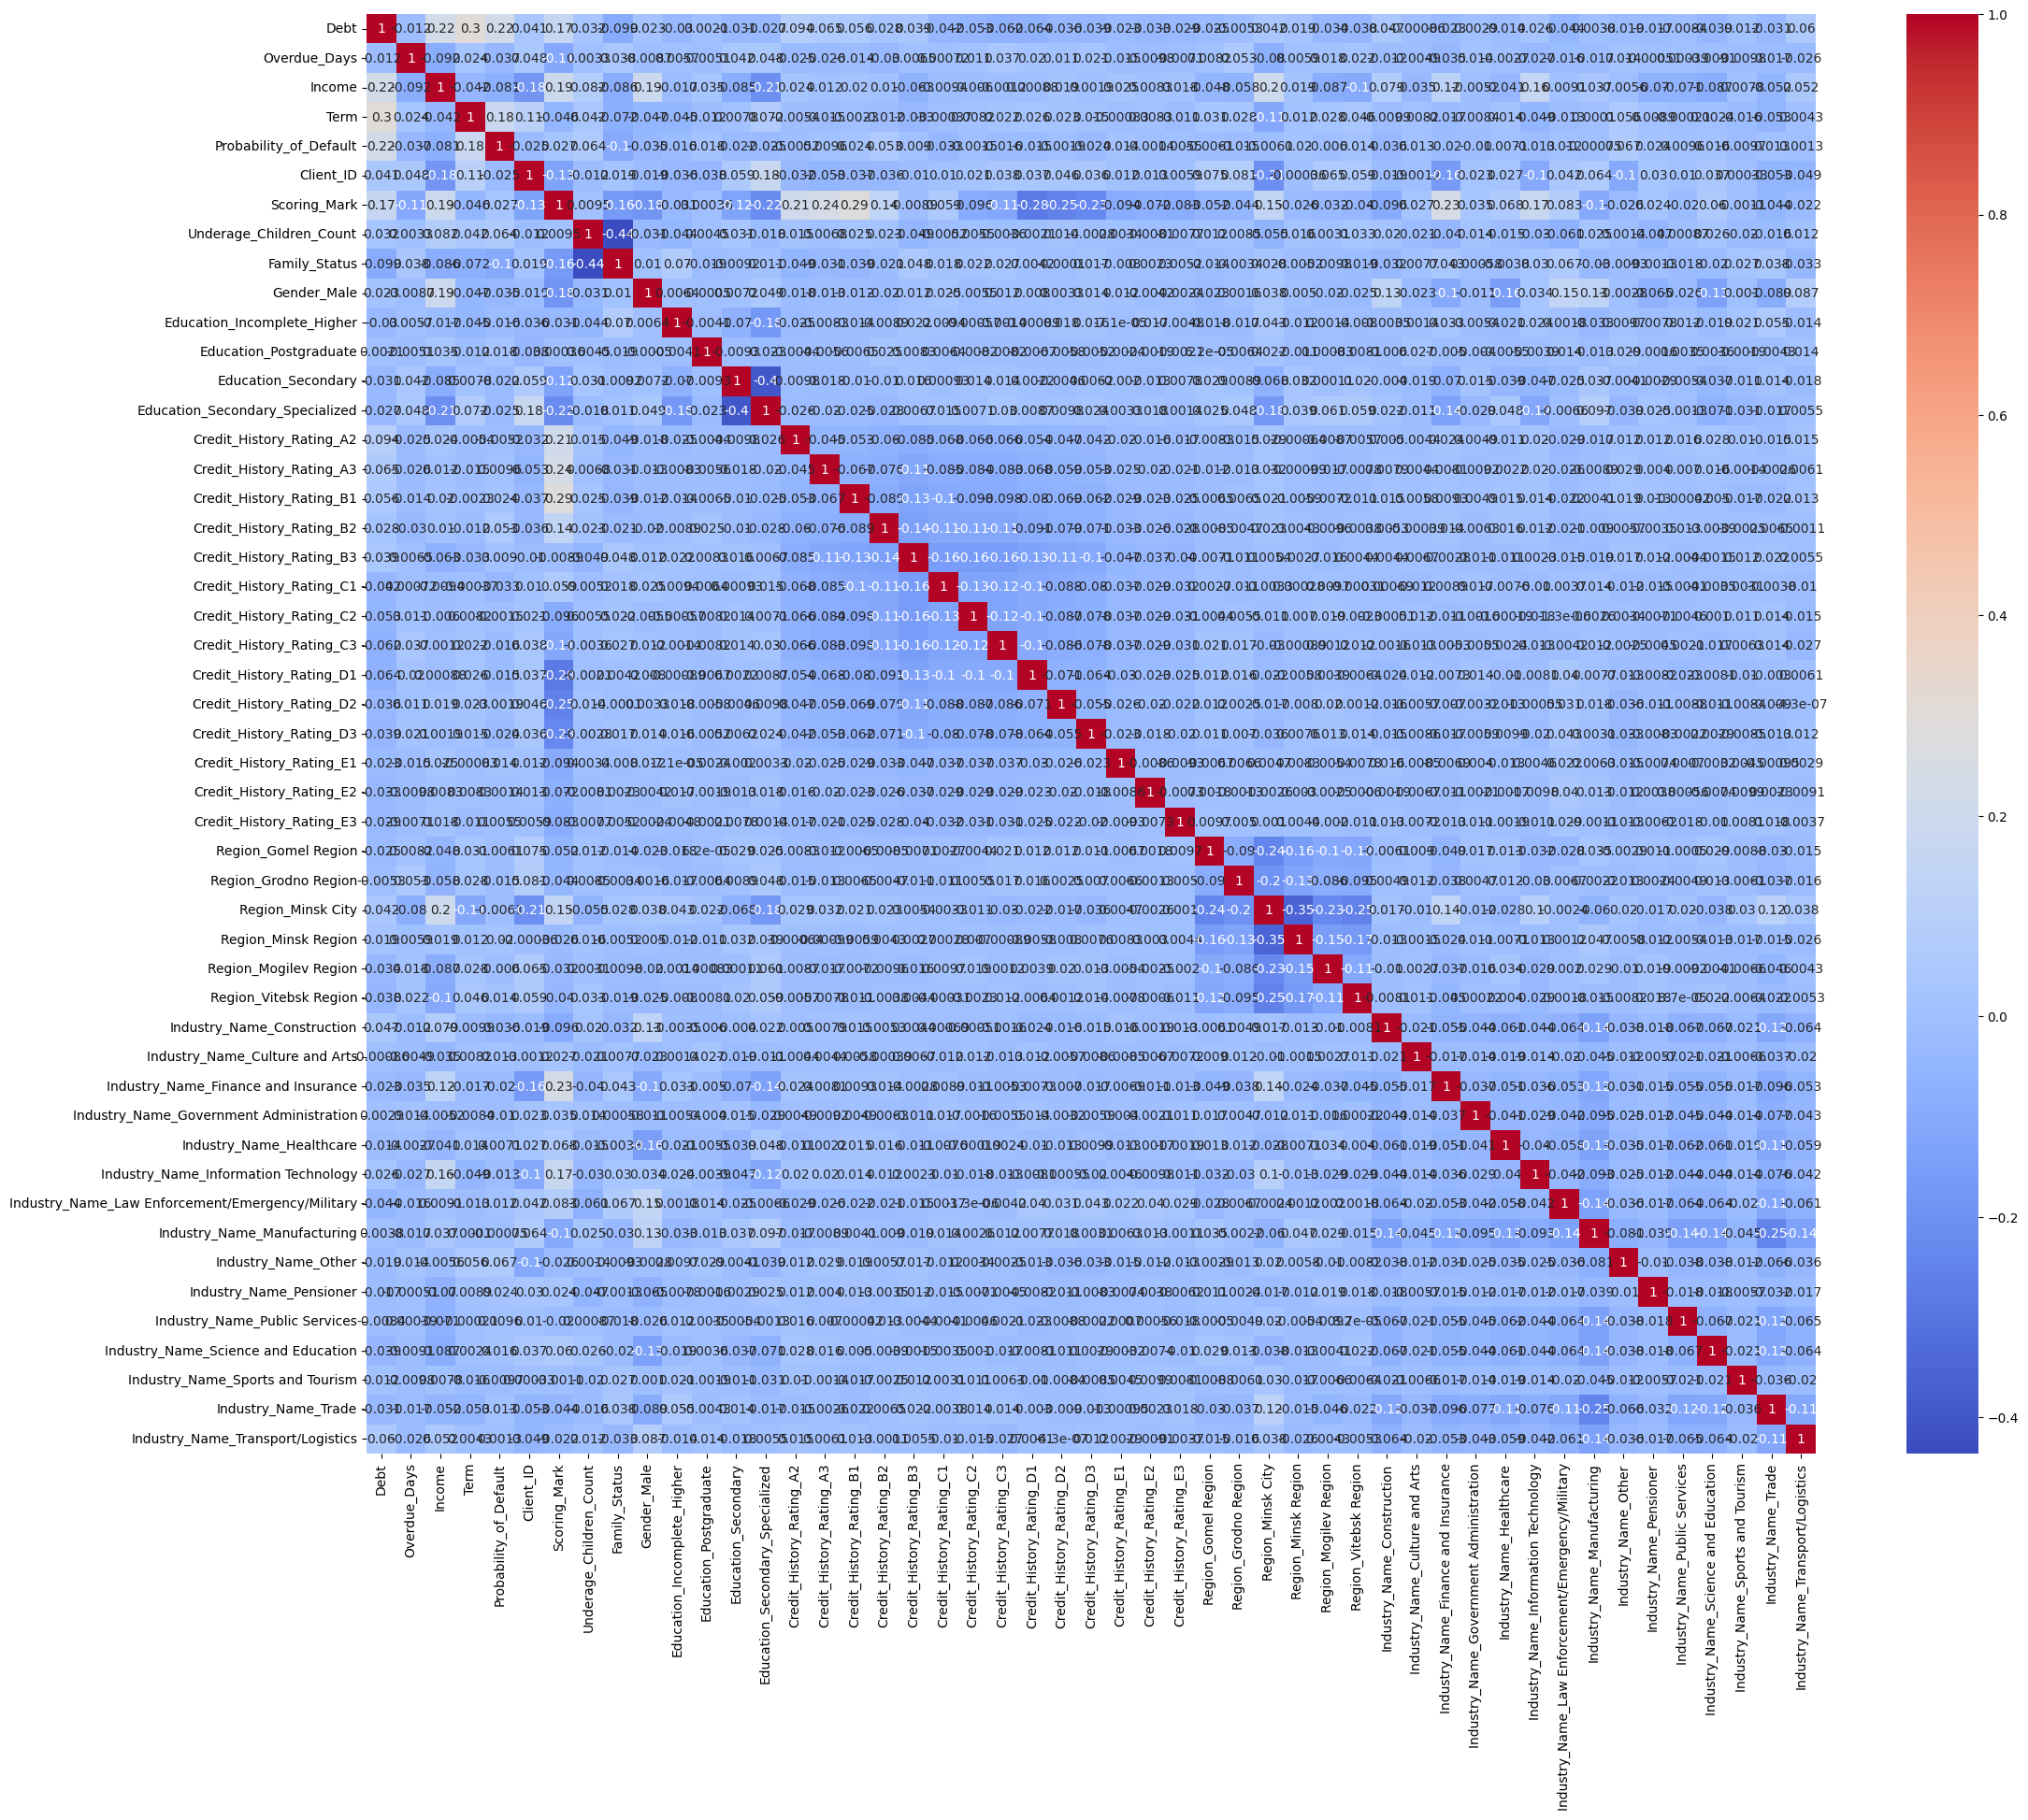

In [223]:
#now plot correlation heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [224]:
df.drop(['Client_ID'], axis=1, inplace=True)

In [229]:
df.columns

Index(['Debt', 'Overdue_Days', 'Income', 'Term', 'Probability_of_Default',
       'Scoring_Mark', 'Underage_Children_Count', 'Family_Status',
       'Gender_Male', 'Education_Incomplete_Higher', 'Education_Postgraduate',
       'Education_Secondary', 'Education_Secondary_Specialized',
       'Credit_History_Rating_A2', 'Credit_History_Rating_A3',
       'Credit_History_Rating_B1', 'Credit_History_Rating_B2',
       'Credit_History_Rating_B3', 'Credit_History_Rating_C1',
       'Credit_History_Rating_C2', 'Credit_History_Rating_C3',
       'Credit_History_Rating_D1', 'Credit_History_Rating_D2',
       'Credit_History_Rating_D3', 'Credit_History_Rating_E1',
       'Credit_History_Rating_E2', 'Credit_History_Rating_E3',
       'Region_Gomel Region', 'Region_Grodno Region', 'Region_Minsk City',
       'Region_Minsk Region', 'Region_Mogilev Region', 'Region_Vitebsk Region',
       'Industry_Name_Construction', 'Industry_Name_Culture and Arts',
       'Industry_Name_Finance and Insurance',
 

In [232]:
df['Overdue'] = (df['Overdue_Days'] > 90).astype(int)

In [233]:
df.drop(['Overdue_Days'], axis=1, inplace=True)

In [234]:
df['Overdue'].value_counts()

Overdue
0    17644
1      752
Name: count, dtype: int64

In [236]:
X = df.drop('Overdue', axis=1)
y = df['Overdue']
X.shape, y.shape

((18396, 47), (18396,))

In [237]:
y.value_counts()

Overdue
0    17644
1      752
Name: count, dtype: int64

In [240]:
#there is class imbalance in the dataset, which my leads to the model being biased towards the majority class.
#lets balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [241]:
y.value_counts()

Overdue
0    17644
1    17644
Name: count, dtype: int64

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28230, 47), (7058, 47), (28230,), (7058,))

****

# 2 Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve



In [244]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1.0
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3529
           1       0.99      0.96      0.98      3529

    accuracy                           0.98      7058
   macro avg       0.98      0.98      0.98      7058
weighted avg       0.98      0.98      0.98      7058



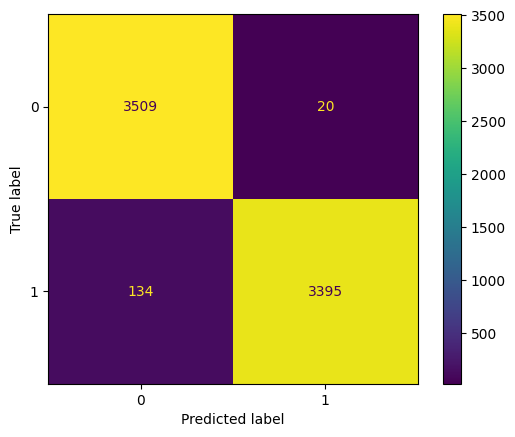

In [ ]:

# Set up the RandomForestClassifier
random_forest = RandomForestClassifier(
    class_weight='balanced', n_estimators=500, random_state=42)


random_forest.fit(X_train, y_train)

# Model evaluation
print(random_forest.score(X_train, y_train))
y_predict = random_forest.predict(X_test)
classification_repo = classification_report(y_test, y_predict)
print(classification_repo)

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

In [254]:
#save model as pkl file
import joblib
joblib.dump(random_forest, 'random_forest_model.pkl')


['random_forest_model.pkl']